<a href="https://colab.research.google.com/github/Ali-mohammadi-design/TensorFlow/blob/main/Tensorflow_House_sale_in_king_county_Prj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

Feature Columns


id - Unique ID for each home sold


date - Date of the home sale


price - Price of each home sold


bedrooms - Number of bedrooms


bathrooms - Number of bathrooms, where .5 accounts for a room with a


toilet but no shower


sqft_living - Square footage of the apartments interior living space


sqft_lot - Square footage of the land space


floors - Number of floors


waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not


view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,


grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level


sqft_basement - The square footage of the interior housing space that is below ground level


yr_built - The year the house was initially built


yr_renovated - The year of the house’s last renovation


zipcode - What zipcode area the house is in


lat - Lattitude


long - Longitude


sqft_living15 - The square footage of interior housing living space for
the nearest 15 neighbors


sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [22]:
df=pd.read_csv('/content/kc_house_data.csv')

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Note: we can explore the null data with df.isull()

Note: the output of isnull is true or false. true means there is a null data.

Thus, we can use .sum to see the number of the missing data.

.sum() on the data frame would sum up all the amounts in every column.

In [24]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<ipython-input-26-80198afdd50f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

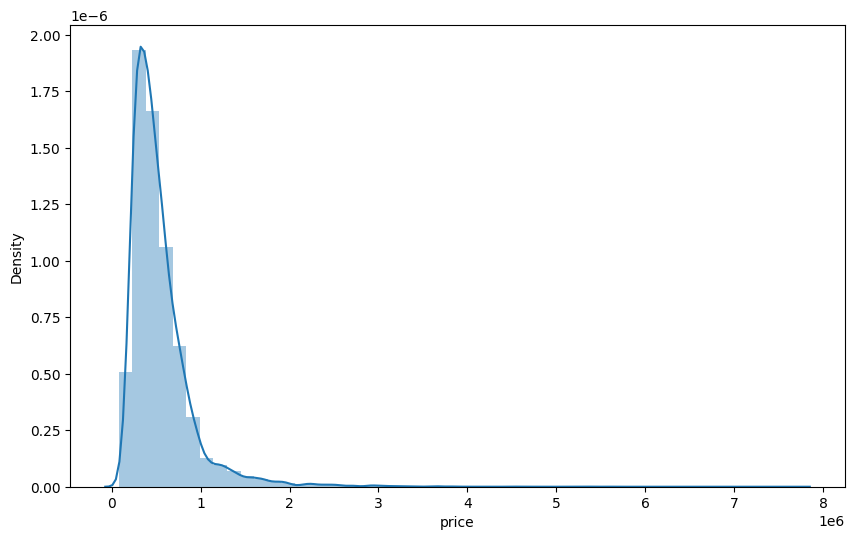

In [26]:
plt.pyplot.figure(figsize = (10,6))
sns.distplot(df['price'])

Note: As is clear on the ditribution of the price, most of the houses are priced among near to 0 to 3 milion dollars. There are afew number of houses that have been priced more than 3 milion dollars which are outliers.

We can remove the outliers to have the better training on our data.

In [33]:
df['bedrooms'].head()

0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

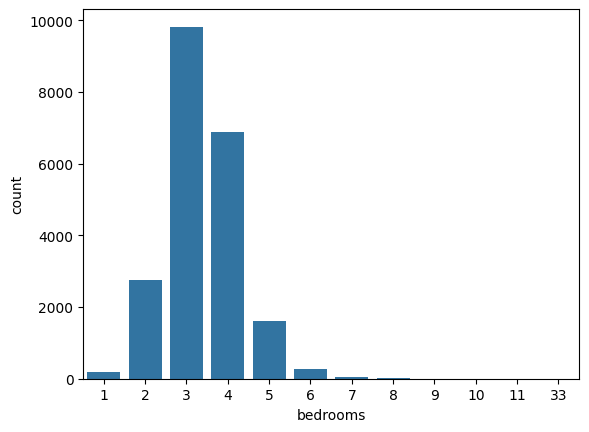

In [38]:
#sns.countplot(df['bedrooms'].head())
sns.countplot(x='bedrooms', data=df)

Note: as is clear the vast majority of the houses have between two to three bedrooms.

Note: you can also see the corrolation between the data.

Note: since the data column is str to see the corrolation we would first convert it to the data with datetime funcion in the dataframe.

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [46]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005385,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,...,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
date,0.005385,1.000000,-0.003998,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.001365,-0.001726,...,-0.039773,-0.027638,-0.019407,-0.000279,-0.024494,0.001605,-0.032485,-0.007228,-0.031198,0.002589
price,-0.016772,-0.003998,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,...,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,-0.016523,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,...,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,-0.034236,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,...,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,-0.034276,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,...,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.006337,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,...,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,-0.022333,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,...,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.001365,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,...,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,-0.001726,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,...,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904


In [50]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64